<a href="https://colab.research.google.com/github/Park-hanna/BDA_study/blob/main/NLP/News_Category_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/avikumart/nlp-news-articles-classif-wordembeddings-rnn

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"parkhannah833","key":"78bf44606c362ad274d8621ef9b609e9"}'}

In [ ]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions list

ref                                                                                           deadline             category             reward  teamCount  userHasEntered  
--------------------------------------------------------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
https://www.kaggle.com/competitions/vesuvius-challenge-ink-detection                          2023-06-14 23:59:00  Featured         $1,000,000        926           False  
https://www.kaggle.com/competitions/asl-fingerspelling                                        2023-08-10 23:59:00  Research           $200,000          0           False  
https://www.kaggle.com/competitions/tlvmc-parkinsons-freezing-gait-prediction                 2023-06-08 23:59:00  Research           $100,000        960           False  
https://www.kaggle.com/competitions/2023-kaggle-ai-report                                     2023-07-05 23:59:00  Analytics           $70,0

In [ ]:
!kaggle datasets download -d rmisra/news-category-dataset

 94% 25.0M/26.5M [00:01<00:00, 32.3MB/s]
100% 26.5M/26.5M [00:01<00:00, 21.1MB/s]


In [ ]:
!unzip /content/news-category-dataset.zip

Archive:  /content/news-category-dataset.zip
  inflating: News_Category_Dataset_v3.json  


In [ ]:
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 117.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 78.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5cb0ca9034e126189b87715cd4603e6e30d855322409f

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import nltk
import pandas_profiling as pp

from markupsafe import escape
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split, cross_val_score
from keras.preprocessing import sequence
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

#model building imports
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras.layers import Conv1D, SimpleRNN, Bidirectional, MaxPooling1D, GlobalMaxPool1D, LSTM, GRU
from keras.models import Sequential
from keras.regularizers import L1L2

%matplotlib inline

# matplotlib defaults
plt.style.use('ggplot')
plt.rc('figure', autolayout=True)
plt.rc(
    "axes",
    labelweight = 'bold',
    labelsize = 'large',
    titleweight = 'bold',
    titlesize = 14,
    titlepad = 10,
)

import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

<ipython-input-8-29b0aedb2ac4>:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df = pd.read_json('/content/News_Category_Dataset_v3.json', lines=True)
df.head()

link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you have a dog you don't understand wha...         Elyse Wanshel   
3  "Accidentally put grown-up toothpaste on my to...      Caroline Bologna   
4  Amy Cooper accused investment firm Franklin Te...        Nina Golgowski   

        date  
0 2022-09-23  
1 2022-09-23  
2 2022-09-23  
3 2022-09-23  
4 2022-09-22

In [ ]:
print(df.shape)
print('Unique categories : ',df['category'].nunique())
print('-'*40)
df.info()

(209527, 6)
Unique categories :  42
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [ ]:
df.describe().style.set_properties(**{'background-color':'#F0F0F0', 'color':'#222222', 'border':'1.5px solid black'})

In [ ]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<h3> Key findings:<h3>

1.    Dataset has total 42 disitnct categories of news articles. <lr>
2.   **'Politics'** is the most common category of news in our dataset.<lr>
3.    We have total of **29169** unique authors who have written various news articles.<lr>
4. Maximum length of headlines is **320** while median length is around **143**.<lr>
5. Maximum length of description is while median length is arond .




# Text data visualization

In [ ]:
# drop columns like authors, links and date as they are irrelvent to our problem
new_df = df.drop(columns = ['authors', 'link', 'date'])
new_df.head()

headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description  
0  Health experts said it is too early to predict...  
1  He was subdued by passengers and crew when he ...  
2  "Until you have a dog you don't understand wha...  
3  "Accidentally put grown-up toothpaste on my to...  
4  Amy Cooper accused investment firm Franklin Te...

# Top 10 Categories of news articles

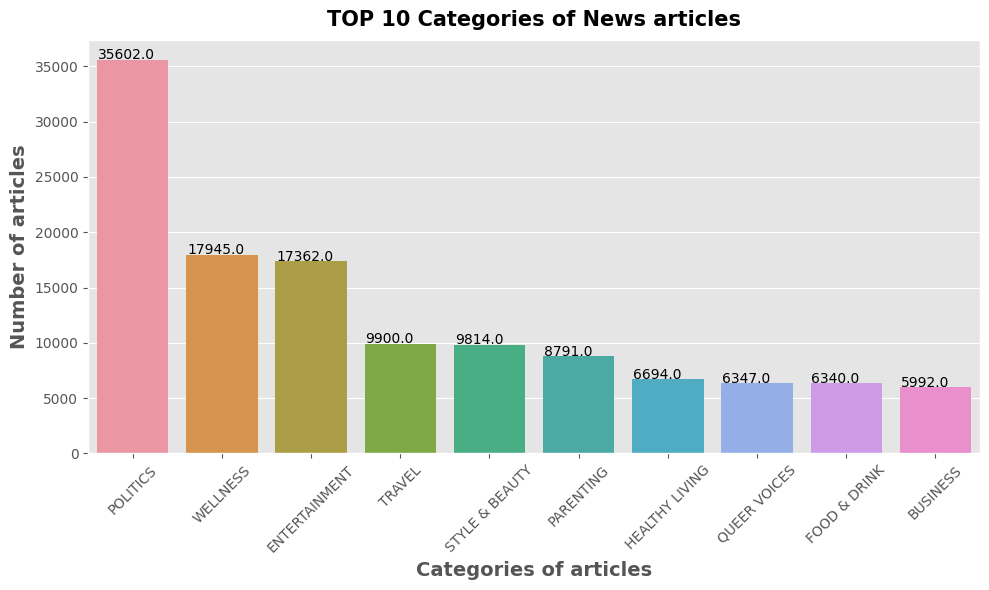

In [ ]:
# Top categories by and number of articles per categories
cat_df = pd.DataFrame(new_df['category'].value_counts()).reset_index()
cat_df.rename(columns={'index':'news_classes','category':'numcat'}, inplace=True)

# Visualize top 10 categories and proportion of each categories in dataset
plt.figure(figsize=(10,6))
ax = sns.barplot(x = np.array(cat_df.news_classes)[:10], y = np.array(cat_df.numcat)[:10])
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.01, p.get_height() + 50))
plt.title("TOP 10 Categories of News articles", size=15)
plt.xlabel("Categories of articles", size=14)
plt.xticks(rotation=45)
plt.ylabel("Number of articles", size=14)
plt.show()

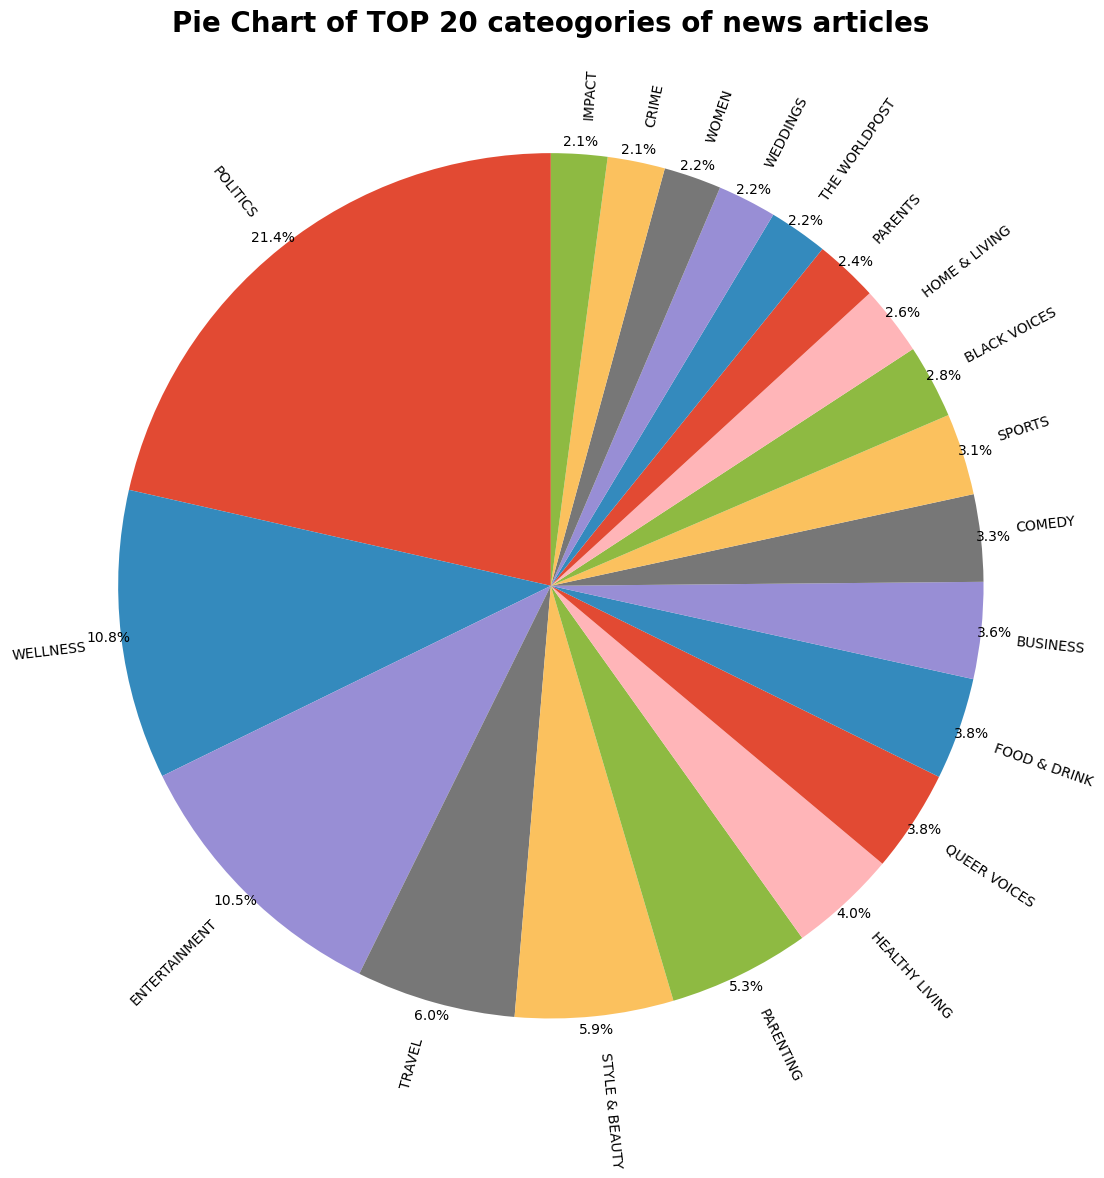

In [ ]:
# plot the pie chart of the top 20 categories of news articles
fig = plt.figure(figsize=(12,12))
A = plt.pie(cat_df['numcat'][:20],
            labels = cat_df['news_classes'][:20],
            autopct = '%1.1f%%',
            startangle = 90,
            labeldistance=1.08,
            pctdistance =1.03,
            rotatelabels = 45)
plt.title('Pie Chart of TOP 20 cateogories of news articles', size = 20, weight = 'bold')
plt.show()

# Lengths of headline and shor_description of each category

In [ ]:
# create final dataframe of combined headline and short_description
final_df = new_df.copy()
final_df['length_of_news'] = final_df['headline'] + final_df['short_description']
final_df.drop(['headline','short_description'], inplace=True, axis =1)
final_df['len_news'] = final_df['length_of_news'].map(lambda x:len(x))
final_df.head()

category                                     length_of_news  len_news
0  U.S. NEWS  Over 4 Million Americans Roll Up Sleeves For O...       230
1  U.S. NEWS  American Airlines Flyer Charged, Banned For Li...       248
2     COMEDY  23 Of The Funniest Tweets About Cats And Dogs ...       133
3  PARENTING  The Funniest Tweets From Parents This Week (Se...       215
4  U.S. NEWS  Woman Who Called Cops On Black Bird-Watcher Lo...       233

In [ ]:
# maximum length of news in each category
lenmax_df = final_df.groupby('category')['len_news'].max().reset_index().sort_values(by = 'len_news', ascending=False)
lenmax_df.head()

category  len_news
24        POLITICS      1486
41       WORLDPOST      1424
4          COLLEGE      1225
16  HEALTHY LIVING      1073
38        WELLNESS      1036

In [ ]:
#minimum length of news in each category
lenmin_df = final_df.groupby('category')['len_news'].min().reset_index().sort_values(by='len_news', ascending=False)
lenmin_df.head()

category  len_news
35      U.S. NEWS        73
8         DIVORCE        66
33  THE WORLDPOST        56
36       WEDDINGS        54
21          MONEY        51

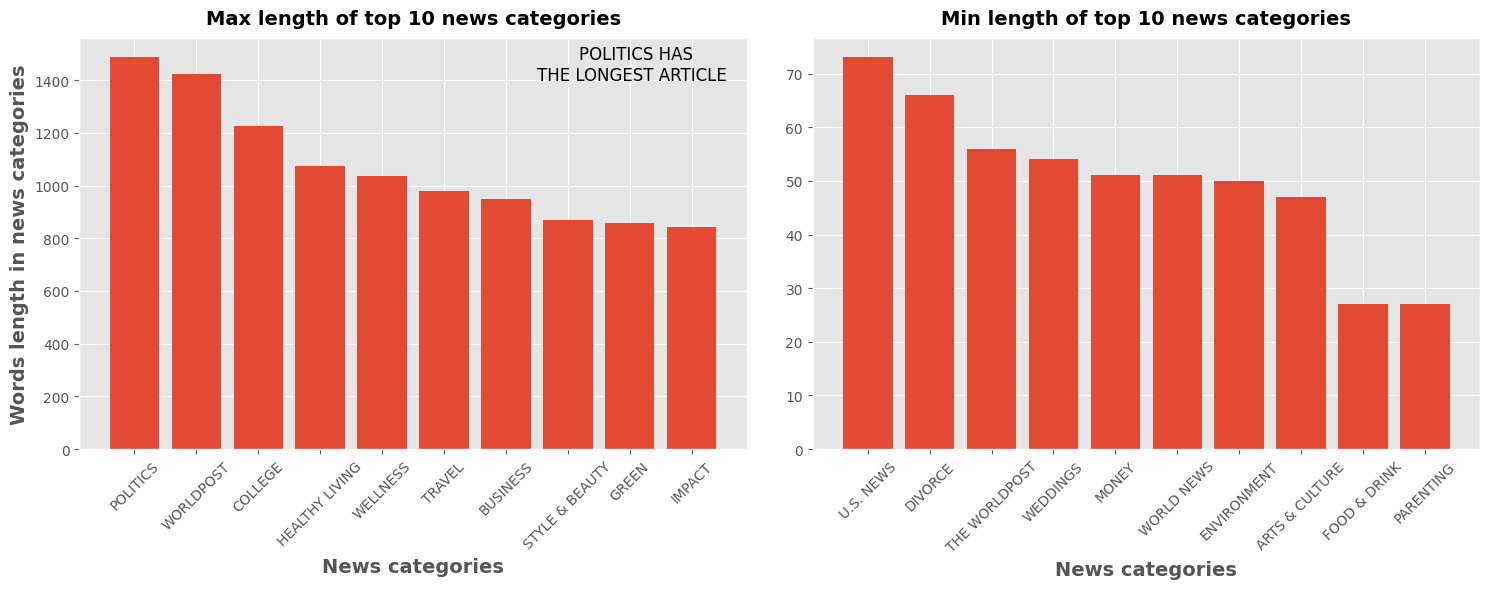

In [ ]:
# plot the bar plots of max and min length of news articles
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.bar(lenmax_df['category'][:10], lenmax_df['len_news'][:10])
plt.xticks(rotation=45)
plt.ylabel('Words length in news categories', size =14)
plt.xlabel('News categories', size = 14)
plt.text(6.5, 1400, '''        POLITICS HAS
THE LONGEST ARTICLE''', fontsize = 12)
plt.title('Max length of top 10 news categories', size = 14)

plt.subplot(122)
plt.bar(lenmin_df['category'][:10], lenmin_df['len_news'][:10])
plt.xticks(rotation=45)
plt.xlabel('News categories', size = 14)
plt.title('Min length of top 10 news categories', size=14)

plt.show()

**Key findings:**


1.   From all the categories of news **POLITICS** has the most number of articles as well as **length of characters** in the article(headlines and short-description)
2.   After 'POLITICS' category, 'WORLDPOST', 'COLLEGE', 'HEALTHY LIVING', 'WELLNESS' categories are in top 5 most length of articles.
3. 'POLITICS', 'WELLNESS' and 'ENTERTAINTMENT' are top 3categories having most number of articles in out dataset.



# Wordclouds of categories and news articles

(-0.5, 1599.5, 599.5, -0.5)

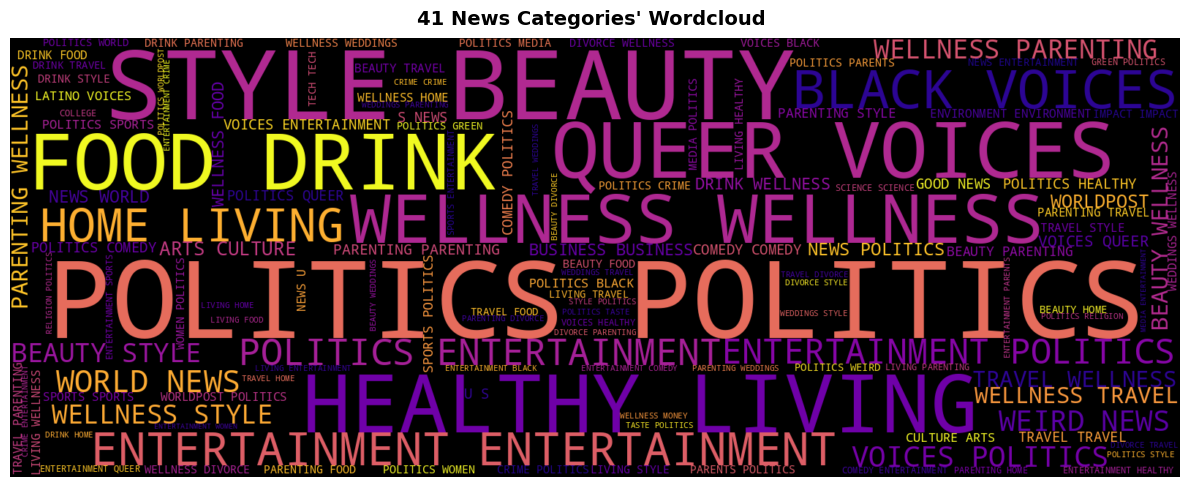

In [ ]:
# wordcloud of categories of news articles in our dataset
plt.figure(figsize=(12,12))
wc = WordCloud(max_words=1000,
               min_font_size = 10,
               height = 600,
               width = 1600,
               background_color = 'black',
               contour_color = 'black',
               colormap = 'plasma',
               repeat = False,
               stopwords = STOPWORDS).generate(' '.join(final_df.category))

plt.title("41 News Categories' Wordcloud ", size = 14, weight = 'bold')
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')

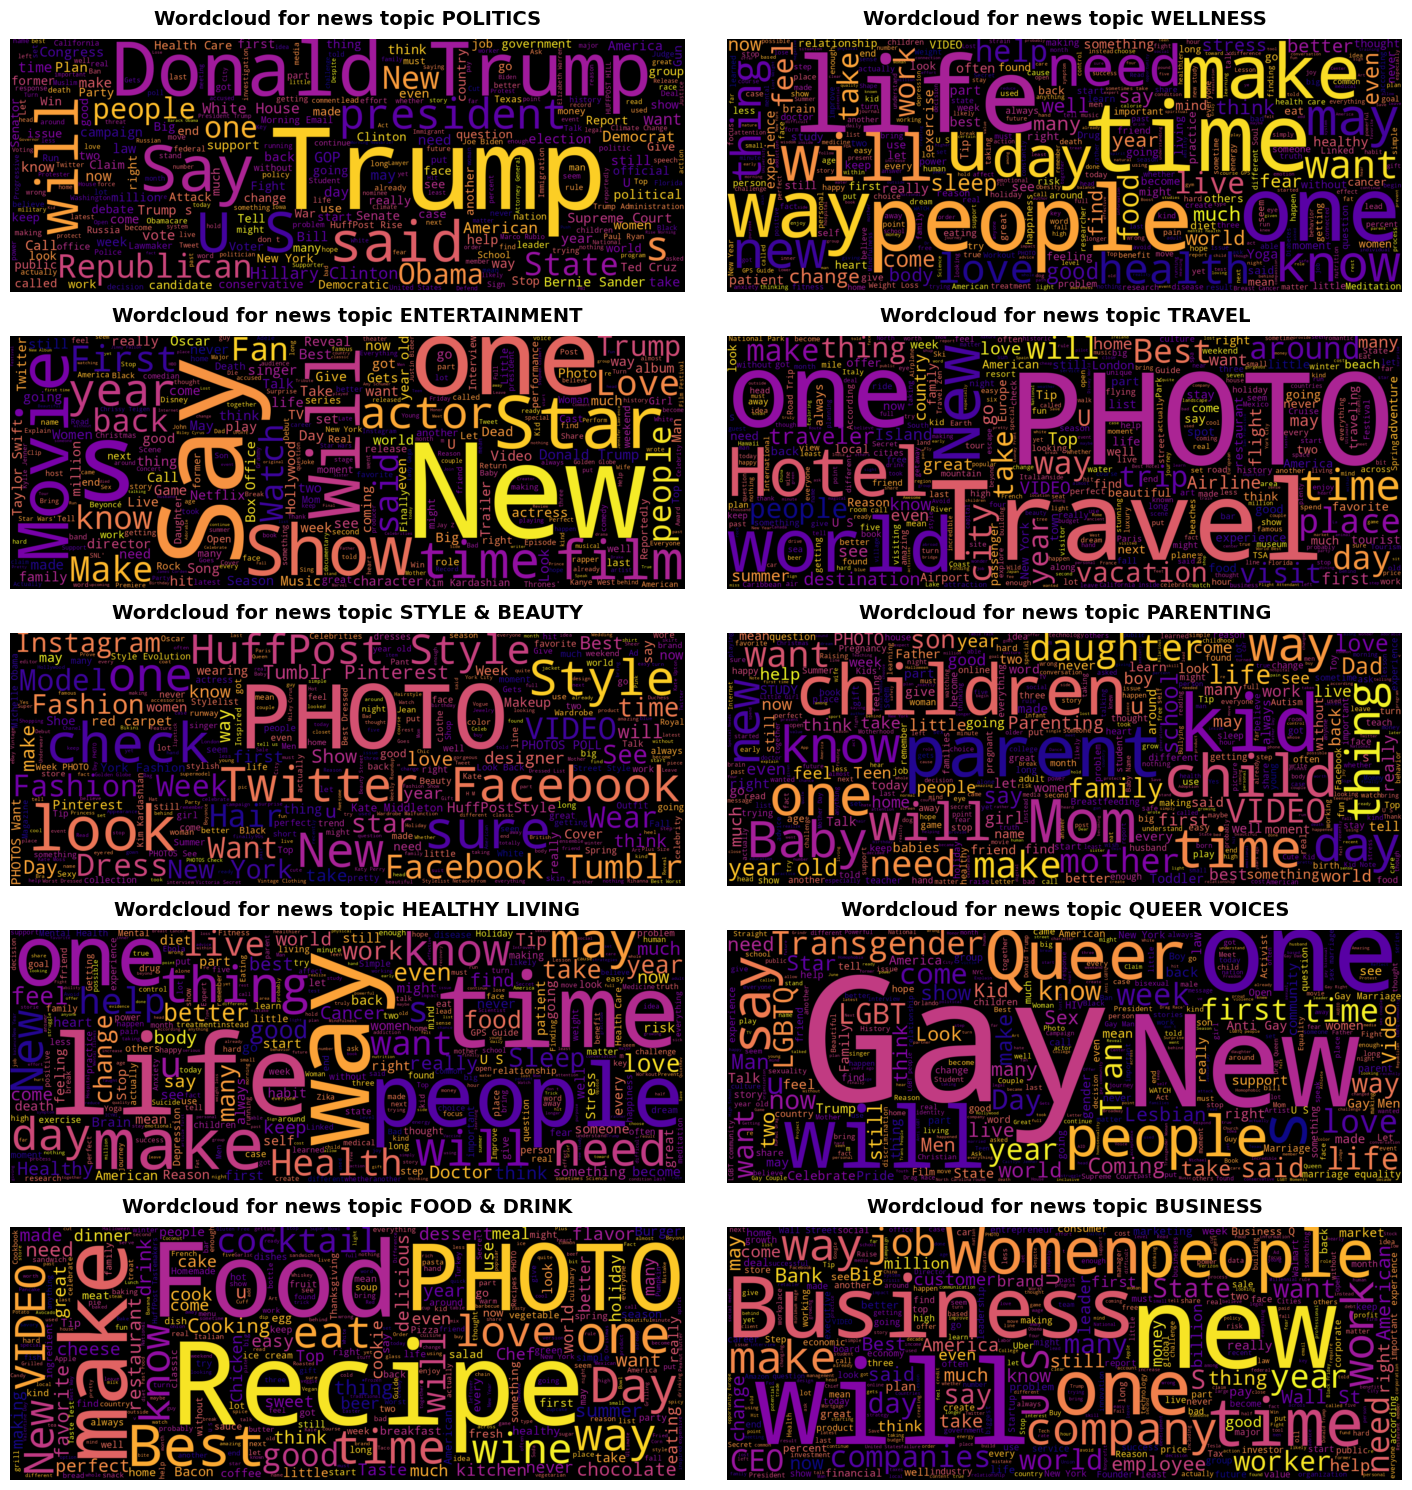

In [ ]:
#create new dataframe of category and length of each news articles in that categories
ndf = final_df.copy()
ndf.drop('len_news', inplace=True, axis = 1)

# list of top10 categories in out dataset
categories = cat_df['news_classes'][:10].to_list()

# list of news articles of each top 10 categories list
articles_list = []

for i in categories:
  cat_ndf = ndf[ndf['category'] == i]
  cat_array = cat_ndf['length_of_news'].values #array of news articles text in each category
  articles_list.append(cat_array)

# create a wordcloud instance
wc1 = WordCloud(max_words=1000,
                min_font_size = 10,
                height = 600,
                width = 1600,
                background_color = 'black',
                contour_color = 'black',
                colormap = 'plasma',
                stopwords = STOPWORDS)

#plot the figure of 10 wordclouds from out dataset
plt.figure(figsize=(15,15))

for idx, j in enumerate(categories):
  plt.subplot(5, 2, idx+1)
  cloud = wc1.generate(' '.join(articles_list[idx]))
  plt.imshow(cloud, interpolation = 'bilinear')
  plt.title(f"Wordcloud for news topic {j}")
  plt.axis('off')

# Text data preprocessing

In [ ]:
# start with removing some daata from politics dataframe ndf
politics_list = list(ndf[ndf['category'] == 'POLITICS'].index)
list_16 = politics_list[:16000] # list of 16000 row labels of Politics category

ndf2 = ndf.copy()
ndf2.drop(list_16, axis = 0, inplace= True)

In [ ]:
# clean the text data using regex and data cleaning function
def datacleaning(text):
  whitespace = re.compile(r"\s+")
  user = re.compile(r"(?i)@[a-z0-9_]+")
  text = whitespace.sub(' ', text)
  text = user.sub(' ', text)
  text = re.sub(r"\[[^()]*\]","", text)
  text = re.sub("\d+","",text)
  text = re.sub(r'[^\w\s]','',text)
  text = re.sub(r"(?:@\S*|#\S*|http(?=.*://)\S*)", "", text)
  text = text.lower()

  #removing stop words
  text = [word for word in text.split() if word not in list(STOPWORDS)]

  #word lemmatization
  sentence = []
  for word in text:
    lemmatizer = WordNetLemmatizer()
    sentence.append(lemmatizer.lemmatize(word, 'v'))

  return ' '.join(sentence)

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# ex of pre-processing using avobe fun
print('Text sentence before pre-processing:\n', ndf2['length_of_news'][0])
print('-'*80)
print('Text sentence after pre-processing:\n', datacleaning(ndf2['length_of_news'][0]))

Text sentence before pre-processing:
 Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID BoostersHealth experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.
--------------------------------------------------------------------------------
Text sentence after pre-processing:
 million americans roll sleeves omicrontargeted covid boostershealth experts say early predict whether demand match million dose new boosters us order fall


In [ ]:
# apply datacleaning fun to column 'length_of_news'
ndf2['lengt_of_news'] = ndf2['length_of_news'].apply(datacleaning)

In [ ]:
# length of total characters before and after cleaning text data
old_length = ndf['length_of_news'].apply(len).sum()
new_length = ndf2['length_of_news'].apply(len).sum()

print(f'Old characters length of text data : {old_length}')
print(f'New characters length of text data : {new_length}')

In [ ]:
# length of totla words before and after cleaning text data
old_text = ndf['length_of_news'].apply(lambda x:len([i for i in x.split()])).sum()
new_text = ndf2['length_of_news'].apply(lambda x:len([i for i in x.split()])).sum()

In [ ]:
print(f'Old word length of text data : {old_text}')
print(f'New word length of text data : {new_text}')

# 2.Tokeniization and vectorization

one-hot encoding and word-indexing example in chunk of data

In [ ]:
# tokenization and vectorization workflow
# word level one-hot encoding for sample data

samples = list(ndf2['length_of_news'][:5].values) #samples of first 5 documents of out dataset

token_index = {} #builds an index of tokens in the data

for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1 #assigning unique index to each unique words

max_length = 15

#results will be sorted in this array
results = np.zeros(shape=(len(samples), max_length , max(token_index.values())+1))

print('Shape of stored results array :', results.shape)
print('Token index of unique words : \n', token_index)

for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i,j,index] = 1

one-hot encoding and indexing of train and test data

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
from keras.utils.data_utils import pad_sequences

In [ ]:
# one hot encoding using keras tokenizer and pad sequencing
X = ndf2['length_of_news']
encoder = LabelEncoder()
y = encoder.fit_transform(ndf2['category'])
print('shape of input data: ',X.shape)
print('shape of target varialble:', y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#padding X_test text input data
tokenizer = Tokenizer(num_words =100000, oov_token='<00V>')
tokenizer.fit_on_texts(X_train) #build the word inedx
#padding X_train text input data
train_seq = tokenizer.texts_to_sequences(X_train)
#converts strinfs into integer list
train_padseq = pad_sequences(train_seq, maxlen=20)
#pads the integer lists to 2d intger tensor

#padding X_test text input data
test_seq = tokenizer.texts_to_sequences(X_test)
test_padseq = pad_sequences(test_seq, maxlen =20)

word_index = tokenizer.word_index
max_words = 150000 # total number of words to consider in embedding layer

total_words = len(word_index)
maxlen = 130 # max length of sequence
y_train = to_categorical(y_train, num_classes=42)
y_test = to_categorical(y_test, num_classes = 42)

print('Length of word index:', total_words)

# 3. what are the wordembedding

In [ ]:
# basline model using embedding layers and simple RNN

model = Sequential()
model.add(Embedding(total_words, 70, input_length=maxlen))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.30, activation='tanh', return_sequences=True)))
model.add(SimpleRNN(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(41, activation='softmax'))
model.summary()